<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Сергей, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Исследование-моделей-с-применением-методик-борьбы-с-дисбалансом-классов" data-toc-modified-id="Исследование-моделей-с-применением-методик-борьбы-с-дисбалансом-классов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей с применением методик борьбы с дисбалансом классов</a></span></li><li><span><a href="#Тестируем-модели-с-наилучшими-гиперпараметрами." data-toc-modified-id="Тестируем-модели-с-наилучшими-гиперпараметрами.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестируем модели с наилучшими гиперпараметрами.</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем все инсрументы необходимые для работы. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Все ли импорты нужны?  mean_squared_error, r2_score, RandomForestRegressor - это все относится к задаче регрессии, у нас же классификация в этом проекте.
    
***
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import f1_score, roc_auc_score`
    
А если через запятую будет больше трех позиций, в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score,
    roc_auc_score
)`
    
        
</div>


Загружаем фаил с данными.

In [2]:
data = pd.read_csv("/datasets/Churn.csv")

Посмотрим на первые 45 стпрочек таблицсы, проведем визуальный анализ.

In [3]:
data.head(45)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Посмотрим общию информацию и данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверим на пропуски в столбцах.

In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце Tenure(сколько лет человек является клиентом банка) 909 пропусков. Посмотрим
на эти строчки, чтобы предположить причину пропусков.

In [6]:
data[data['Tenure'].isna()].head(50)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Может быть есть какая то взазь пропусков с уходом клиента из банка. Проверим,
если будет ли явный пререкос в данных.

In [7]:
data.loc[(data['Exited']==1)& (data['Tenure'].isna())].count()

RowNumber          183
CustomerId         183
Surname            183
CreditScore        183
Geography          183
Gender             183
Age                183
Tenure               0
Balance            183
NumOfProducts      183
HasCrCard          183
IsActiveMember     183
EstimatedSalary    183
Exited             183
dtype: int64

Особых закономерностей первым осмотром не выявленно, связи
по пропускам и уход квлиента из банка не обнаружено, примерно 9%
ухода клиентов (183)   имеют пропуски в столбце Tenure и примерно
9% всей таблицы имеют пропуски в стлбце  Tenure. Исходя из этого
можно предположить сто главный признак не связан с уходом клиента
из банка. Заменим пропуски на медианное значение этого столбца.

In [8]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно  
</div> 


    

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим нет ли выбросов в столбцах: Balance, CreditScore, Age, EstimatedSalary, Tenure.

In [10]:
data['Balance'].max()

250898.09

In [11]:
data['Balance'].min()

0.0

In [12]:
data['Tenure'].max()

10.0

In [13]:
data['Tenure'].min()

0.0

In [14]:
data['CreditScore'].max()

850

In [15]:
data['CreditScore'].min()

350

In [16]:
data['Age'].max()

92

In [17]:
data['Age'].min()

18

In [18]:
data['EstimatedSalary'].max()

199992.48

In [19]:
data['EstimatedSalary'].min()

11.58

Проверим уникальные значения столбца с главным признаком.

In [20]:
data['Exited'].unique()

array([1, 0])

Удалим столбцы с фамилией, номером клиента, и унткальным индетификатором клиента
т.к. они могут не правильно повлиять на обучение модели.

In [21]:
data = data.drop(['RowNumber','Surname','CustomerId'], axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div> 


Столбцы пол с страна проживания(Geography, Gender) нербходимо преобразовать 
методом get_dummies() прямое кодирование, с удалением первого столбца

In [22]:
var_categorical = ['Geography', 'Gender']
data = pd.get_dummies(data, drop_first=True, columns=var_categorical)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. В дамми-ловушку не попались.
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

А теперь замечания «под звездочкой»:

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также можно здесь <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 

Посмотрим на первые пять строк таблицы.

In [23]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Масштабирование необходимо сделать после разбиения на выборки: учимся на трейне, применяем масштабирование ко всем трем.


В реальном применении моделей у нас не будет возможности обучить скелер сразу и на тренировочной, и на рабочей выборке. Поэтому здесь воспроизводим реальную ситуацию - обучаемся только на тренировочной выборке, масштабируем обученным таким образом скелером все три выборки.

</div>



In [24]:
data.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

Разделим таблицу на три выборки, тренировачную, валидационную и тестовую.
Соотношением 3:1:1

In [25]:
features = data.drop(columns=['Exited'], axis = 1)
target = data['Exited']
 
features_train, features_in, target_train, target_in = train_test_split(\
    features, target, test_size=0.4, random_state=12345)
 
features_valid, features_test, target_valid, target_test = train_test_split(\
    features_in, target_in, test_size=0.5, random_state=12345)

Проверим результат разделения таблицы методом shape.

In [26]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape, target_test.shape

((6000, 11), (6000,), (2000, 11), (2000,), (2000, 11), (2000,))

Проведем маштабирование признаков.

In [27]:
numeric = [ 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,1,0,0,1.524268,1,0,0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 С разбиением на выборки согласен. 
</div>

## Исследование задачи

Необходимо построить модель для предсказания уйдёт клиент из банка в ближайшее 
время или нет. Распологаемые данные  о поведении клиентов и расторжении договоров
с банком, практически подготовленны для построения оптимальной модели.
Необходимо довести метрику F1 до 0.59. После чего проверим ее F1-меру на тестовой
выборке.
Иследуем три модели: Случайный лес, Дерево решений, логистическую регрессию с
изменением гиперпараметров.

Так как в дальнейшем понадобится вычислять метрику auc_roc (площадь под ROC-кривой),
напишем функцию "auc_roc"  при обращении к которой данная метрика будет  вычисляться
автоматичечки с помощью передачи параметров(model, признаки, целевой признак).

In [40]:
def auc_roc(model, features, target):
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target, probabilities_one)
    return 'Площадь под ROC-кривой ', auc_roc

In [34]:
model = None
best_result = 0
best_result1 = 0
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth = i, random_state=12345)
    model.fit(features_train, target_train)
    p = model.predict(features_valid)
    best_result = f1_score(target_valid, p)
    if best_result1 < best_result:
        best_result1 = best_result
        depth = i
        f1 = best_result
        mod_roc = model
print("F1 наилучшей модели на валидационной выборке:", f1)
print('Глубина: ', depth)


auc_roc(mod_roc, features_valid, target_valid)

F1 наилучшей модели на валидационной выборке: 0.5696969696969697
Глубина:  6


('Площадь под ROC-кривой ', 0.8164631712023421)

In [35]:
#model = RandomForestClassifier(random_state=12345) 
#model.fit(features_train, target_train)
#predictions_valid = model.predict(features_valid)
#result = f1_score(target_valid, predictions_valid)
#print('F1 модели случайный лес равно: ', result)

In [36]:
best_model = None
best_result = 0;best_est=0
for i in range(1,16):    
    for est in range(1, 81):
        model = RandomForestClassifier(random_state=12345, max_depth = i,  n_estimators=est)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            depth = i
print("F1 наилучшей модели на валидационной выборке:", best_result, best_est, depth)
print('Глубина: ', depth)
print('Количество деревьев: ', best_est)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Площадь под ROC-кривой ',auc_roc)

F1 наилучшей модели на валидационной выборке: 0.5999999999999999 9 14
Глубина:  14
Количество деревьев:  9
Площадь под ROC-кривой  0.8428870849690597


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Здесь все отлично по обучению моделей.
</div>


In [37]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)
print('F1 модели логистическая регрессия равно: ', result)

F1 модели логистическая регрессия равно:  0.33108108108108103


Вывод:
Было исследованно три модели.
Как и следовало ожидать метрика F1 модели случайный лес отказалась самая высокая
даже чуть выше заданного параметра 0.59.
Значение наибольшей метрики F1 модели случайный лес равна 0.59999 при гиперпара-
метрах: глубина - 14, количество деревьев - 9.
Модель  дерево  решений  имеет  показатели  F1  примерно 0.57 при глубине 6.
Модель  логистическая регрессия  имеет  показатели  F1 = 0.331.


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По ТЗ проекта мы должны посмотреть на модели без учета дисбаланса классов.
    
* Нужно выбрать минимум два алгоритма (а лучше три: Случайный лес, Дерево решений, логистическую регрессию).
* В Дереве и Лесе нужно в цикле подобрать гиперпараметры (в Лесе - глубину и количество деревьев - обязательно).
* Смотрим модель с лучшим F1, измеряем ROC_AUC.

</div>


Тестируем модель с наилучшими гитерпараметрами.

Вывод:
Тестирование модели с наилучшими гиперпараметрами показало не достаточный
резуальтат 0.54. Для выполнения задания необходимо добиться показателя F1
не ниже 0.59.

## Исследование моделей с применением методик борьбы с дисбалансом классов

**Для борьбы с дисбалансом класса будем использовать
 
1) Метод взвешавания классов - class_weight.
2) Технику upsampling. Создадим функцию upsample(), передадим в нее три 
   аргумента features(тренировочная выборка), target(целевой признак
   тренировочной выборки), и  repeat(число на которое умножается положительный
   класс тренировочной выборки)

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`
    
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Tестирование - это третий шаг в нашем цикле работы с моделями. 1) подготовка+анализ 2) исследование моделей 3) тестирование. На тестировании мы смотрим лучшую модель, которую нашли на втором шаге, не трогаем валидационную выборку, используем тестовую выборку и уже не подбираем гиперпараметры. 
    
Предлагаю перенести подзаголовок с тестированием ниже, к тому месту проекта, где мы действительно делаем тестирование.
    
Здесь же можно озаглавить как-то типа «Исследование моделей с применением методик борьбы с дисбалансом классов».

</div>

Боремся с дисбалансом кдасса, т.к. маквсимальное F1 будет при балансе классов
1:1 подставим число умножения выборки класса равное 4.

In [54]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model = RandomForestClassifier(random_state=12345, max_depth = 14, n_estimators=9)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1 на валидционной выборке равен: ",f1_score(target_valid, predicted_valid))


F1 на тестовой выборке равен:  0.5992779783393503


При применение метода class_weigth вычислим налучшие гиперпараметры.

In [62]:
best_model = None
best_result = 0;best_est=0
for i in range(1,16):    
    for est in range(1, 81):
        model = RandomForestClassifier(random_state=12345, max_depth = i,  n_estimators=est, class_weight='balanced') # обучите модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)# обучите модель на тренировочной выборке
        result = f1_score(target_valid, predictions_valid) # посчитайте качество модели на валидационной выборке
        if result > best_result:
            best_model = model# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_est = est
            depth = i
print("F1 наилучшей модели на валидационной выборке:", best_result, best_est, depth)
print('Глубина: ', depth)
print('Количество деревьев: ', best_est)


F1 наилучшей модели на валидационной выборке: 0.6292906178489703 60 9
Глубина:  9
Количество деревьев:  60


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Ошибка в переменной. Вместо model, видимо, нужно подать best_model.

</div>


Проверим на тестовой выборке.

<div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Мы не имеем права трогать тестовую выборку до тестирования (или валидационную выборку после тестирования - если у нас вышла такая история с подзаголовком). 
    
На тестировании уже смотрим ранее подобранную лучшую модель. Иначе мы будем в той или иной мере подбирать лучшие параметры на тестовой выборке, а о том, как модель будет работать с реальными данными судить не сможем.
    
Сначала мы подбираем лучшую модель и ее гиперпараметры на валидационной выборке. Затем в промежуточном выводе описываем эту модель. И только после этого смотрим качество модели на тестовой выборке.

</div>


<div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Выше написал, здесь напомню, что в Лесе нужно смотреть и глубину, и количество деревьев.
    
`for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)`
   

    

</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также пока не стоит трогать тестовую выборку.
       
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Нужно починить названия выборок. И да, тестовую пока не трогаем :)

</div>




<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь аналитически верным решением будет сделать баланс классов 1:1. Ничего подбирать не стоит, кроме гиперпараметров. При грамотном подборе моделей и параметров лучшее значение баланса будет стремиться к 1:1, количество повторений - к 4-м в нашей задаче.

</div>



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
И здесь подаем неверные выборки. 

</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Будет ошибочно использовать одновременно апсеплинг или даунсемплинг и взвешенные классы class_weight='balanced'. Мы и так доводим соотношение классов к 1:1, так что, class_weight работать не будет. Технически это не приведет к падению кода или ухудшению результатов (но и к улучшению не приведет аналитически), фактически же такой код говорит о том, что мы не понимаем механизма работы и назначения этого параметра и, соответственно, техники борьбы с дибсалансом.

</div>

<div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Пока не достигаем необходимого качества по f1.

</div>

## Тестируем модели с наилучшими гиперпараметрами.

Тестируем модель на тестовой тыборке. Сначала используем технику upsampled,
затем применим метод class_weight(сбалансированность классов).

In [64]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model = RandomForestClassifier(random_state=12345, max_depth = 9, n_estimators=60)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print("F1 на тестовой выборке равен: ",f1_score(target_test, predicted_test))
auc_roc(model, features_test, target_test)

F1 на тестовой выборке равен:  0.6070686070686071


('Площадь под ROC-кривой ', 0.8527158278504088)

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Ага, теперь все верно и по исследованию моделей, и по качеству на тесте.
</div>


In [59]:
model = RandomForestClassifier(random_state=12345, max_depth = 9, n_estimators=60, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1 на тестовой выборке равен: ",f1_score(target_test, predicted_test))
auc_roc(model, features_test, target_test)

F1 на тестовой выборке равен:  0.610738255033557


('Площадь под ROC-кривой ', 0.8532495041757174)

Вычислим полноту recall(показатель качества модели, доля охвата моделью из клиентов
которые перестанут пользоваться услугами банка).

In [66]:
recall_score(target_test, predicted_test)

0.6903073286052009

"recall " = 0.69

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Кстати, это достаточно неплохой результат.
</div>


Построим ROC- кривую самой лучшей модели.

In [60]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

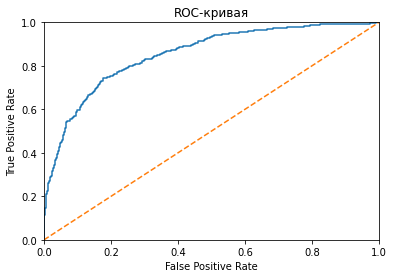

In [61]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")# < примените функции plt.xlim() и plt.ylim(), чтобы
plt.ylabel("True Positive Rate")
plt.title('ROC-кривая')#   установить границы осей от 0 до 1 >
plt.show()

### Вывод:
     Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно.
Банковские маркетологи  посчитали: сохранять  текущих  клиентов  дешевле, чем 
привлекать новых. Нужно спрогнозировать, уйдёт клиент из  банка  в  ближайшее 
время или нет. Вам предоставлены исторические данные о  поведении  клиентов и 
расторжении договоров с банком. 
     Были построины модели для задачи предсказания отказа клиента от банковс-
ких услуг «Бета-Банка». 
Распологаемые данные переработанны. Пропуски в толбце Tenure(сколько лет клиен
пользуется услугами банка) на медианное значения этого столбца, данные  чистые
без выбросов и авнамалий.
   - Было проведенно исследование моделей дерево решений, случайный лес и 
     логистическая регрессия.
   - Самое высокое качество у модели случайный лес(RandomForestClassifier)
     с гиперпараметрами n_estimators равным - 60 и max_depth равным 9
     метрика F1 = 0.61; auc_roc = 0.85
   
        
Рекомендации бизнесу.
Рекомендую: 
Для предсказания поведения клиента использовать модель случайный лес.
Показатель качества этой модели F1 = 0.61(это выше установленного порога для 
технического задания на 0.2) auc_roc = 0.85 это самые высокие показатели. 
А также показатель качества recall  почти 70% это говорит о том, что модель предскажет
70% клиентов из 100% которые уйдут из банка.
Показатели auc_roc и F1 коррелируют между собой, метрика F1 более подхоит в этой
задаче т.к. в ней необходима точность прогноза.





<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 По выводу: со смысловыми акцентами все ок. Единственное, по ТЗ у нас порог не 0.2, а 0.59. 
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Наша задача - найти оптимальную модель и объяснить, что она будет полезна бизнесу. Именно на этом следует сделать акцент в финальном выводе.
 
Необходимо дополнить общий вывод по проекту: описать лучшую модель, ее результаты на тестовой выборке, сравнить модель с константной, прокомментировать, как модель решает задачу бизнеса: здесь можно подсчитать recall и объяснить, какую долю клиентов на отток мы детектируем верно.

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
    
Импорт: from sklearn.dummy import DummyClassifier

       
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта. Выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 
    
**На что стоит обратить внимание🤔**
    
* Необходимо поправить ошибки, чтобы проект отрабатывал без падений.
* Нужно масштабировать данные после разбиения на выборки.
* Гиперпараметры моделеям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса. Смотрим везде все модели.
* До тестирования тестовую выборку не трогаем. После объявления тестирования уже не трогаем валидационную: Гиперпараметры подбираем на валидационной, после чего описываем лучшую модель. Затем проводим тестирование этой лучшей модели на тестовой выборке.
* Апсемплинг не нужно сочетать с гиперпараметром взвешенных классов.
* Необходимо везде оставлять промежуточные выводы и дополнить итоговый вывод.
* Необходимо достичь качества модели F1>0.59 на тесте.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


Привет Кирил. Проект я начал делать почти 2 недели назад, накидать код без пояснений
давольнотаки быстро, но у меня ни как не выходило 0,62 т.к. когда я начал делать проект
в условии задачи было F1 не 0.59 а 0.62. По этому я использовал умножение класов и 
баланс в месте, хотя это не правильно. В теории не говорили что кодирование надо использовать
до разделения выборок

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 По сочетанию методов - да, это ошибка, но зато мы увидели, что качество не меняется(если заметил, там один в один до десятой доли после запятой будет результат равным). По энкодингу - выше написал, что если используем get_dummies(), то нужно применять до разбиения на выборки, так как если какая-то категория не попадет в тренировочную и окажется на валидационной или тестовой, то код упадет (количество колонок не совпадет в выборках). 
    
Второй метод от Sklearn (также дал инструкцию выше в желтом комментарии)  уже умеет работать с незнакомыми категориями, что и удобно, и правильно, если берем модель в прод. Более подробно о том, чем методы отличаются, описано по ссылке на колаб. Там же и решения по коду. Дальше в проектах все это понадобится. Я думаю, ссылку или инструкцию еще должны будут скинуть или отобразить в тренажере, но на всякий случай советую ее себе сохранить.
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 

Желаю удачи в дальнейшей учебе!

</div>



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*